# Initial EDA and Feauture Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import pickle

In [2]:
with open('cl_matches.p', 'rb') as f:
    data = pickle.load(f)

## Initial Feature Engineering
- Create feature for value difference between home team and away team
- Create feature for score difference between home team and away team
- Create features for "richer team" vs. "poorer team"

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head(3)

,home_team,away_team,score,match_season,home_value,away_value
0,AC Milan,Liverpool,5:6 on pens,2004,273.70,200.12
1,Liverpool,Chelsea,1:0,2004,200.12,331.47
2,PSV Eindhoven,AC Milan,3:1,2004,86.85,273.70


In [5]:
# Function to clean and convert score string to ints
def score_cleaner(x):
    if re.search(r'on pens', x):
        diff = 0
    elif re.search(r'AET', x):
        x = x[:-4].split(':')
        diff = int(x[0]) - int(x[1])
    else:
        x = x.split(':')
        diff = int(x[0]) - int(x[1])
    
    return diff

In [6]:
df['score_diff'] = df['score'].map(score_cleaner)
df['value_diff'] = df['home_value'] - df['away_value']

In [7]:
# Convert scores from home team - away team to "rich team" - "score team"
df['rp_score_diff'] = np.select(
    [df['home_value'] >= df['away_value'], df['home_value'] < df['away_value']],
    [df['score_diff'], -df['score_diff']]
)

# Convert value_diff to absolute ("rich team" value - "poor team" value)
df['rp_value_diff'] = np.abs(df['value_diff'])

In [40]:
df['richer'] = np.where(df['home_value'] > df['away_value'], df['home_value'], df['away_value'])
df['poorer'] = np.where(df['home_value'] < df['away_value'], df['home_value'], df['away_value'])

In [41]:
df.head()

,home_team,away_team,score,match_season,home_value,away_value,score_diff,value_diff,rp_score_diff,rp_value_diff,richer,poorer
0,AC Milan,Liverpool,5:6 on pens,2004,273.70,200.12,0,73.58,0,73.58,273.70,200.12
1,Liverpool,Chelsea,1:0,2004,200.12,331.47,1,-131.35,-1,131.35,331.47,200.12
2,PSV Eindhoven,AC Milan,3:1,2004,86.85,273.70,2,-186.85,-2,186.85,273.70,86.85
3,AC Milan,PSV Eindhoven,2:0,2004,273.70,86.85,2,186.85,2,186.85,273.70,86.85
4,Chelsea,Liverpool,0:0,2004,331.47,200.12,0,131.35,0,131.35,331.47,200.12


## Initial EDA and Data Viz

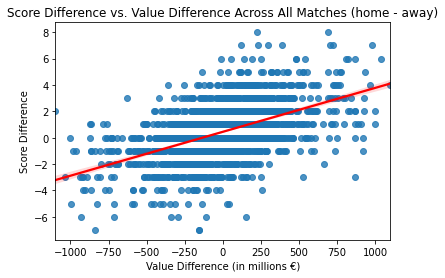

In [75]:
sns.regplot(x='value_diff', y='score_diff', data=df, line_kws={'color': 'red'})
plt.xlabel('Value Difference (in millions €)')
plt.ylabel('Score Difference')
plt.title('Score Difference vs. Value Difference Across All Matches (home - away)')
plt.show()

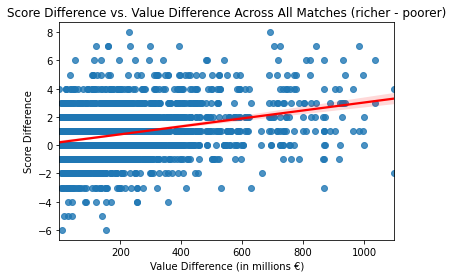

In [76]:
sns.regplot(x='rp_value_diff', y='rp_score_diff', data=df, line_kws={'color': 'red'})
plt.xlabel('Value Difference (in millions €)')
plt.ylabel('Score Difference')
plt.title('Score Difference vs. Value Difference Across All Matches (richer - poorer)')
plt.show()

In [77]:
df.corr()

,match_season,home_value,away_value,score_diff,value_diff,rp_score_diff,rp_value_diff,richer,poorer
match_season,1.000000,0.466448,0.468859,-0.021880,-0.002548,0.048571,0.460245,0.623548,0.410308
home_value,0.466448,1.000000,0.244600,0.312904,0.613793,0.128063,0.387675,0.742925,0.677507
away_value,0.468859,0.244600,1.000000,-0.305095,-0.615353,-0.088245,0.387561,0.743436,0.678421
score_diff,-0.021880,0.312904,-0.305095,1.000000,0.502782,0.133215,-0.003593,0.002116,0.007444
value_diff,-0.002548,0.613793,-0.615353,0.502782,1.000000,0.175957,-0.000393,-0.001348,-0.001594
rp_score_diff,0.048571,0.128063,-0.088245,0.133215,0.175957,1.000000,0.299436,0.134215,-0.146926
rp_value_diff,0.460245,0.387675,0.387561,-0.003593,-0.000393,0.299436,1.000000,0.754984,-0.022999
richer,0.623548,0.742925,0.743436,0.002116,-0.001348,0.134215,0.754984,1.000000,0.638206
poorer,0.410308,0.677507,0.678421,0.007444,-0.001594,-0.146926,-0.022999,0.638206,1.000000


In [45]:
df.describe()

,match_season,home_value,away_value,score_diff,value_diff,rp_score_diff,rp_value_diff,richer,poorer
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,2011.477432,288.763420,289.003440,0.442327,-0.240020,0.850552,228.783872,403.275366,174.491494
std,4.599433,246.604186,246.984498,2.009744,303.346515,1.873772,199.125194,258.580940,169.607581
min,2004.000000,9.050000,9.050000,-7.000000,-1098.980000,-6.000000,0.200000,26.120000,9.050000
25%,2007.000000,102.570000,102.570000,-1.000000,-176.082500,0.000000,90.810000,215.950000,69.280000
50%,2011.000000,217.125000,216.350000,0.000000,0.000000,1.000000,176.030000,331.470000,121.050000
75%,2015.000000,396.500000,396.500000,2.000000,175.447500,2.000000,304.182500,542.000000,218.200000
max,2019.000000,1203.450000,1203.450000,8.000000,1098.980000,8.000000,1098.980000,1203.450000,1172.400000


## Premier League TV Contract Effect
- Sources: https://www.bbc.com/news/business-31379128#:~:text=The%20last%20TV%20rights%20auction,%C2%A37.6m%20per%20game
- For season beginning 2016 the English Premier League sold broadcasting rights for £5.1B
- From 2012-2015 the broadcasting rights sold for £3B
- In the season beginning 2017 a massive spike in club value (especially the richer club) possibly influenced by previous season broadcast revenues

In [48]:
by_year = df.groupby(['match_season'])['rp_value_diff', 'richer', 'poorer'].mean().reset_index()

/Users/waynelam/soccer_analysis/soccer/soccer-venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


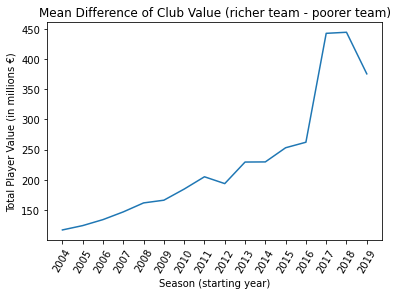

In [80]:
sns.lineplot(x='match_season', y='rp_value_diff', data=by_year)
plt.title('Mean Difference of Club Value (richer team - poorer team)')
plt.ylabel('Total Player Value (in millions €)')
plt.xlabel('Season (starting year)')
plt.xticks(ticks=range(2004, 2020), rotation=60)
plt.show()

In [64]:
# Convert df from wide to long for seaborn plotting
sns_df = pd.melt(
    by_year, 
    id_vars=['match_season'], 
    value_vars=['richer', 'poorer'], 
    var_name='Relative Value',
    value_name='Value',
)

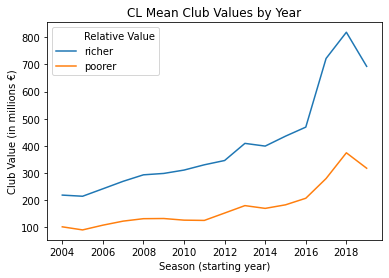

In [79]:
sns.lineplot(x='match_season', y='Value', hue='Relative Value', data=sns_df)
plt.xlabel('Season (starting year)')
plt.ylabel('Club Value (in millions €)')
plt.title('CL Mean Club Values by Year')
plt.show()